In [3]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/notebooks


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


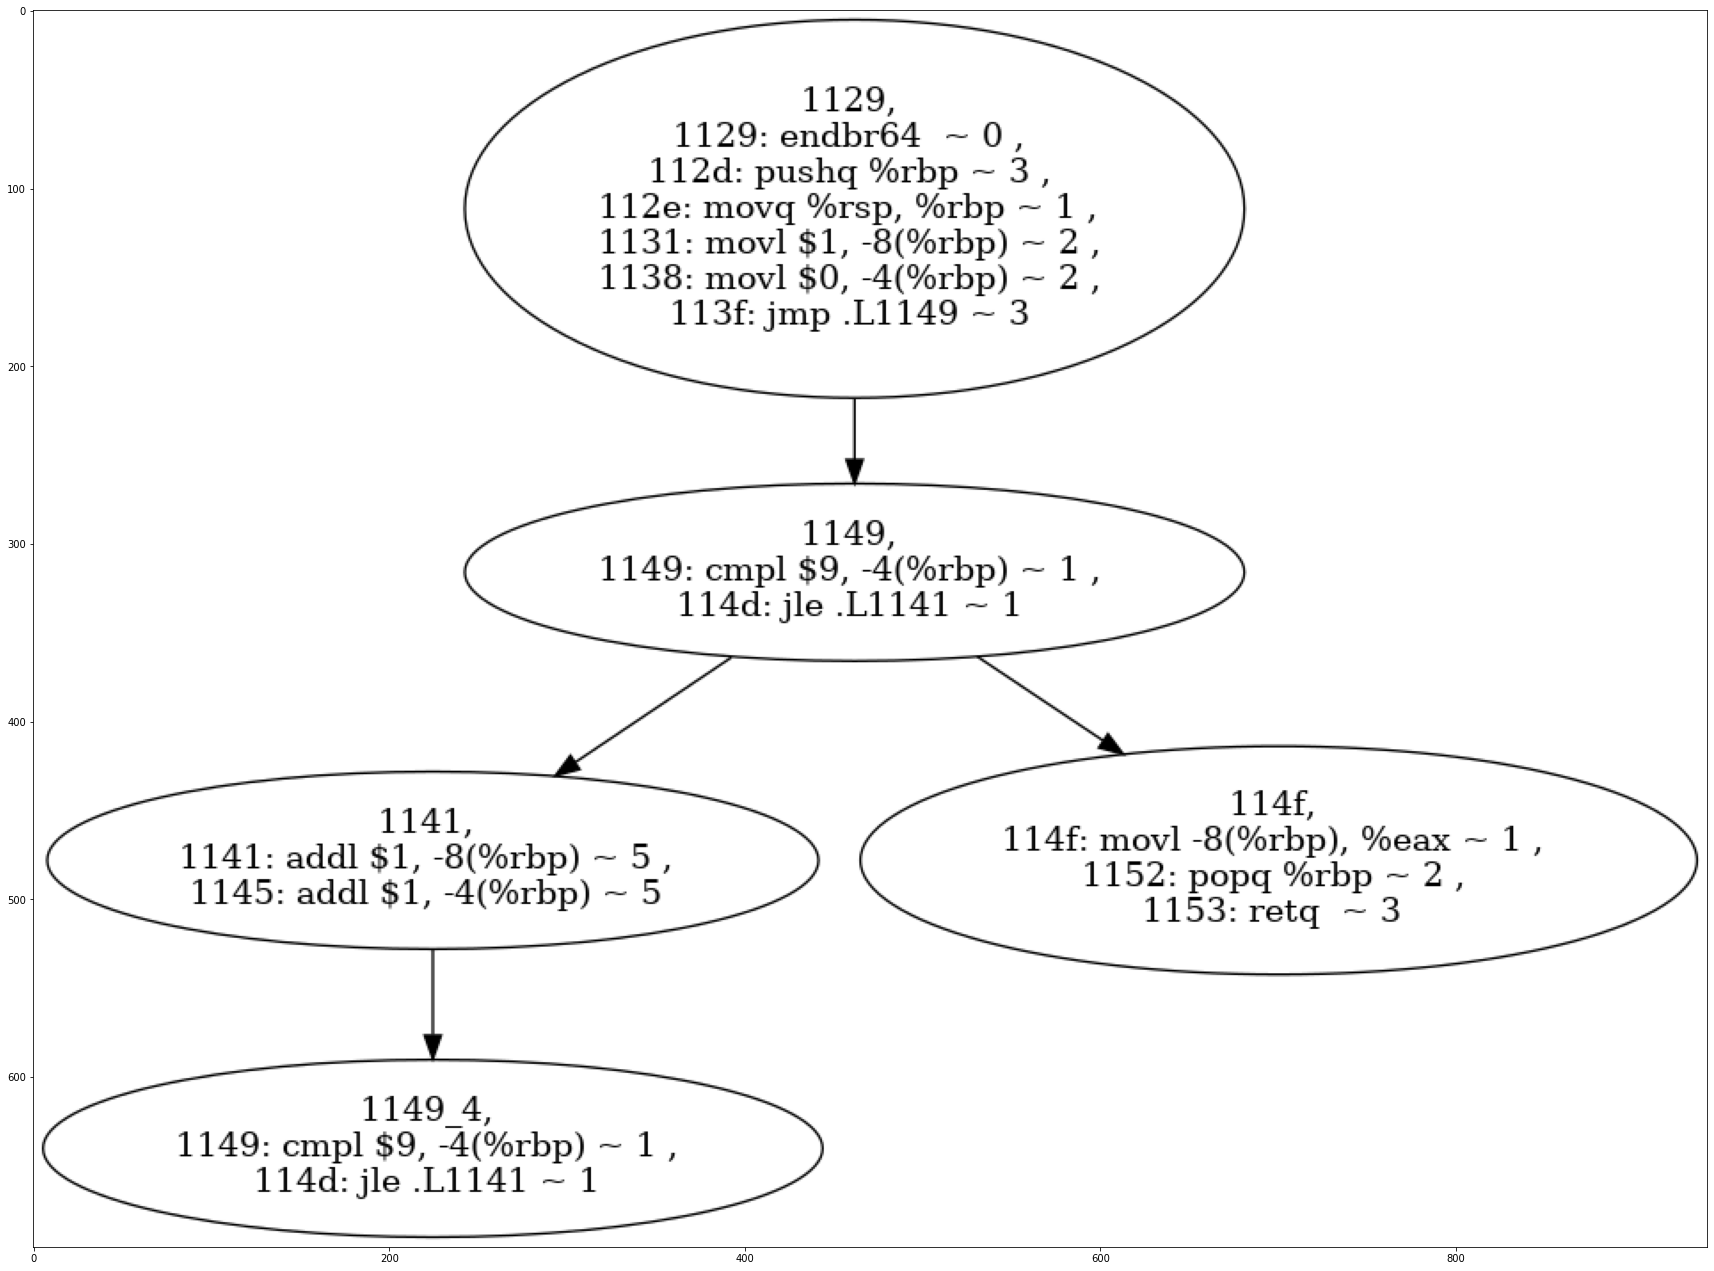

In [12]:
%autoreload 2 

from test_main import setup 
from rwtools.nemesis.graph.utils import create_graph_structure, to_img
# from rwtools.nemesis.graph.utils import unwind_graph
from rwtools.nemesis.graph.balance import balance_branching_point
binary = os.path.abspath("../samples_notebooks/simple_loop/simple_loop")
outputfile = "./simple_loop.s"
loader, rw = setup(binary, outputfile)

loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, 1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()
control_flow_graph.unwind_graph()
target_node = control_flow_graph.get_node('1149')
axs.imshow(to_img(graph))


# Inserting a completely new new into a graph
Goal: insert a completely new node into the graph in such a way that RetroWrite will include it into the final code 

Main difficulty will be (i'm guessing) the control flow  (?) 

InstructionWrappers are initially contained inside Function classes. They are modified by inserting instructions before and after. They are never removed or deleted, but they are moved between nodes, and empty nodes are deleted (but this should be OK) 

Container contains a list of functions, we are currently working with one such function. 
Inside function, instructions are stored inside Function.cache


### Creating a new instructionWrapper
The InstructionWrapper class has an argument `instruction`, which is of type `capstone.CsInsn`. 
This data comes from the dissassembly process

# Is this even something I need to take into account? 

In [52]:

target_fn = None
for _, fn in container.functions.items():
    if fn.name == "main":
        target_fn = fn

function_cache = target_fn.cache

for wrapper in function_cache: 
    print(str(wrapper))
    


1129: endbr64 
112d: pushq %rbp
112e: movq %rsp, %rbp
1131: movl $1, -8(%rbp)
1138: movl $0, -4(%rbp)
113f: jmp .L1149
1141: addl $1, -8(%rbp)
1145: addl $1, -4(%rbp)
1149: cmpl $9, -4(%rbp)
114d: jle .L1141
114f: movl -8(%rbp), %eax
1152: popq %rbp
1153: retq 
